In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# initial conditions:
Lx=0.01
Ly=0.01
nx=21
ny=21
dx=Lx/(nx-1)
dy=Ly/(ny-1)
alpha=1e-4
x=numpy.linspace(0,Lx,num=nx)
y=numpy.linspace(0,Ly,num=ny)

In [6]:
def ftcs(T0,dx,dy,nt,nx,ny,alpha,q):
    T=T0.copy()
    ny,nx=T.shape
    I,J=int(nx/2),int(ny/2)
    for n in range(nt):
        T[1:-1,1:-1]=T[1:-1,1:-1]+alpha*(((dt/dy**2)*(T[2:,1:-1]-2*T[1:-1,1:-1]+T[:-2,1:-1])) 
                                         +(dt/dx**2)*(T[1:-1,2:]-2*T[1:-1,1:-1] +T[1:-1,:-2]))
        #applying newman condition
        T[-1,:]=T[-2,:]+q*dy
        T[:,-1]=T[:,-2]+q*dx
        #applying drichlet 
        T[0,:]=100
        T[:,0]=100
        if(T[I,J]>70):
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J, I], (n + 1) * dt))
    return T
                                         

In [7]:
Tb=100
T0=20*numpy.ones((ny,nx))
T0[:,0]=Tb
T0[0,:]=Tb

In [10]:
#stability condition:
sigma=0.25
dt=sigma*min(dx,dy)**2/alpha
nt=500
q=0
T=ftcs(T0,dx,dy,nt,nx,ny,alpha,q)

[time step 256] Center at T=70.02 at t=0.16 s


(0.0, 0.01, 0.0, 0.01)

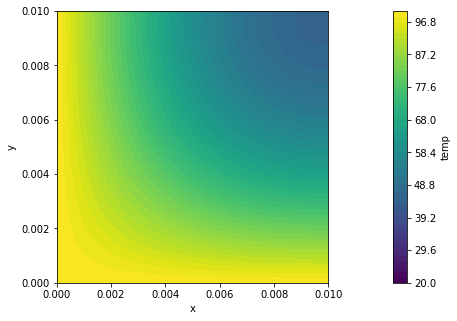

In [16]:
#plot:
pyplot.figure(figsize=(8,5))
pyplot.xlabel('x')
pyplot.ylabel('y')
levels=numpy.linspace(20,100,num=51)
contf=pyplot.contourf(x,y,T,levels=levels)
cbar=pyplot.colorbar(contf)
cbar.set_label('temp')
pyplot.axis('scaled', adjustable='box')